<a href="https://colab.research.google.com/github/shrishiva16/Project-1/blob/main/Linear_Regression_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression:

Y = wX + b

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

Gradient Descent:
w = w - α*dw

b = b - α*db
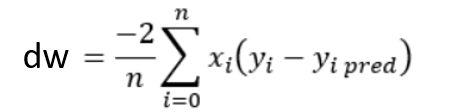

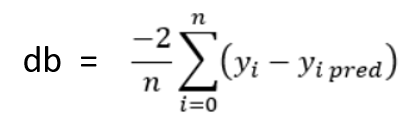

In [46]:
import numpy as np
class Linear_Regression():
  def __init__(self,learning_rate,no_of_iterations):
    self.learning_rate=learning_rate
    self.no_of_iterations=no_of_iterations

  def fit(self,X,Y):
    self.m,self.n=X.shape #m - no of training examples n- no of features
    self.w=np.zeros(self.n)
    self.b=0
    self.X=X
    self.Y=Y

    for i in range(self.no_of_iterations):
      self.update_weight()



  def update_weight(self):
    Y_prediction=self.predict(self.X)
    dw=-(2*(self.X.T).dot(self.Y-Y_prediction))/self.m
    db=-2*np.sum(self.Y-Y_prediction)/self.m
    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db



  def predict(self,X):
    return X.dot(self.w)+self.b

Importing dependencies

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


Data-Pre Processing

In [37]:
salary_dataframe=pd.read_csv('/content/salary_data.csv')
salary_dataframe.head()


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [38]:
salary_dataframe.shape

(30, 2)

In [30]:
salary_dataframe.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [48]:
#splitting training and test data
X=salary_dataframe.iloc[:,:-1].values #years of experience
Y=salary_dataframe.iloc[:,1].values# target value salary
print(X)
print(Y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [96]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=2)

In [97]:
model=Linear_Regression(learning_rate=0.0198,no_of_iterations=1500)
#fitting the Linear Regression model
model.fit(X_train,Y_train)

In [98]:
#printing the vcalues of parameters - weights and bias
print('Weight ',model.w[0])
print("Bias ",model.b)

Weight  9512.980565710637
Bias  23707.558954720353


y=weight(x)+Bias
salary=yearsof_experience(weight)+Bias

*basic equation

*value changes as experience changes






In [99]:
#Prediction
test_data_prediction=model.predict(X_test)
print(test_data_prediction)

[ 36074.43369014  34171.837577    66515.97150042  58905.58704785
  91249.72097127  80785.44234898 101713.99959355  52246.50065185
  42733.52008614  88395.82680155]


Visualizing predicted values vs actual values


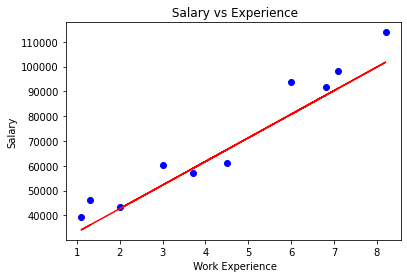

In [100]:
plt.scatter(X_test,Y_test,color='blue')
plt.plot(X_test,test_data_prediction,color='red')
plt.xlabel(' Work Experience')
plt.ylabel('Salary')
plt.title(' Salary vs Experience')
plt.show()